In [9]:
from pathlib import Path

SRC_DIR = Path("..") / "src"
if SRC_DIR.exists():
    import sys
    sys.path.append(str(SRC_DIR))

In [10]:
from utils import save_raw
from dataloader import DataLoader

import matplotlib.pyplot as plt

In [11]:
# Configuration constants
FILENAME = "curry2"
DROP_COLUMNS = [11]
CHANNEL_TYPE = "eeg"
SAMPLING_RATE = 256.0
MONTAGE = "standard_1020"
INPUT_PATH = Path(f"../data/text/{FILENAME}.txt")
OUTPUT_PATH = Path(f"../data/raw/{FILENAME}_raw.fif")

In [12]:
# Load and preprocess data
dataloader = DataLoader(sampling_rate=SAMPLING_RATE)

raw_arr = dataloader.load_from_txt(
    filepath=INPUT_PATH,
    delimeter='\t',
    header=None,
    drop_columns=DROP_COLUMNS
)

raw = dataloader.create_mne_raw(ch_types=CHANNEL_TYPE, montage=MONTAGE)

In [13]:
# Saved processed data
save_raw(raw, OUTPUT_PATH)

In [14]:
# Metadata summary
n_channels = raw.info['nchan']
sfreq = raw.info['sfreq']
ch_names = raw.info['ch_names']

print(f"Number of channels: {n_channels}")
print(f"Sampling frequency: {sfreq} Hz")
print(f"Channel names: {ch_names}")

Number of channels: 18
Sampling frequency: 256.0 Hz
Channel names: ['C3', 'C4', 'O1', 'O2', 'Cz', 'F3', 'F4', 'F7', 'F8', 'Fp1', 'Fp2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6']


In [ ]:
# Visualization of continous EEG data
raw.plot(n_channels=n_channels, duration=10.0, show=False, scalings=0.05);

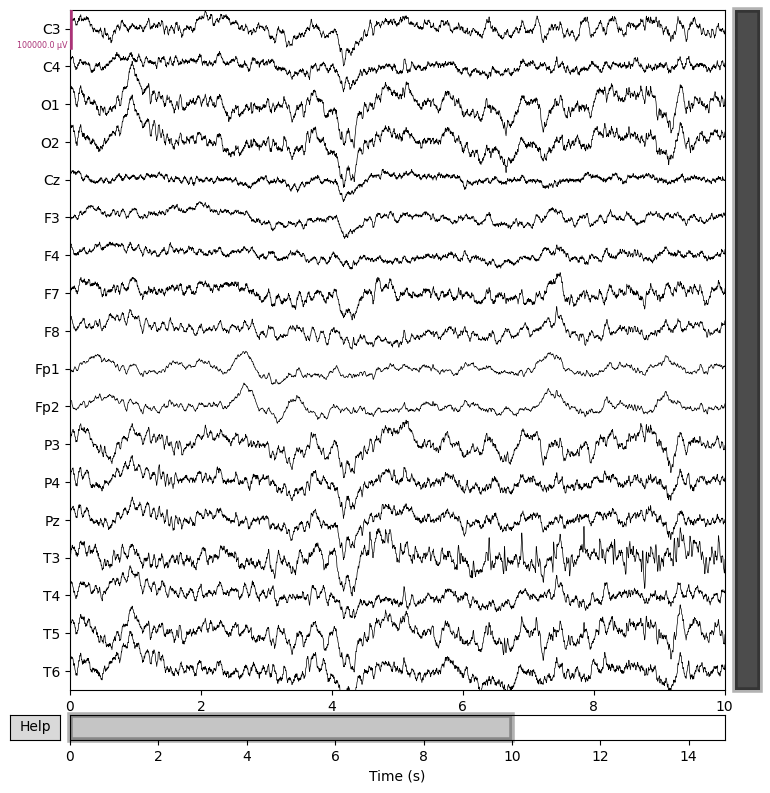

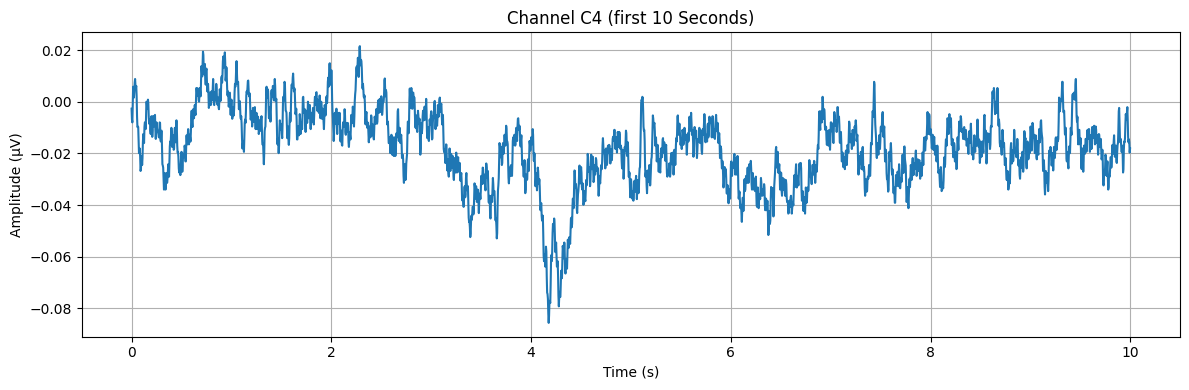

In [16]:
# Visualization of one example channel (10 seconds @ 256 Hz)
data, times = raw.get_data(return_times=True)
demo_channel = 1
plt.figure(figsize=(12,4))
plt.plot(times[:2560], data[demo_channel, :2560])
plt.title(f"Channel {ch_names[demo_channel]} (first 10 Seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.grid(True)
plt.tight_layout()
plt.show()